In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np

In [13]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pandas as pd 

In [14]:
import os

In [15]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
df = pd.read_csv("C:/Users/Sinivasan/Downloads/amazon_prime_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [17]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [18]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
df.director.fillna("unknown", inplace=True)
df.cast.fillna("unknown", inplace=True)
df.country.fillna("unknown", inplace=True)
df.date_added.fillna("unknown", inplace=True)
df.rating.fillna("U", inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [21]:
type_counts = df['type'].value_counts()
type_counts

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

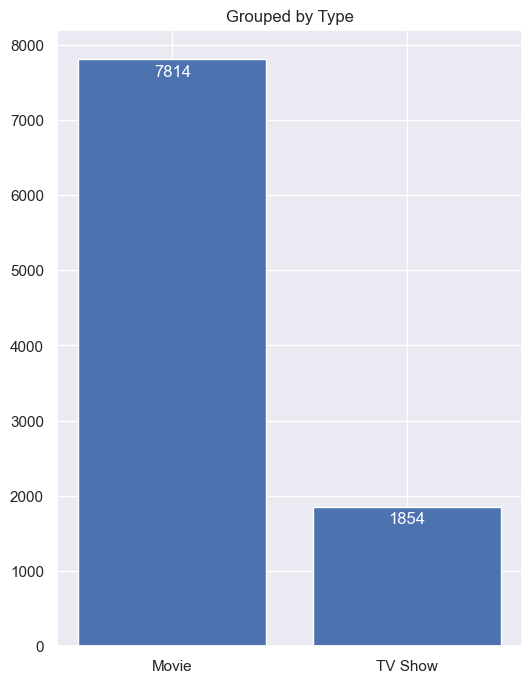

In [23]:
plt.figure(figsize=(6,8))
plt.bar(type_counts.index, type_counts.values)
plt.title('Grouped by Type')
for i, value in enumerate(type_counts.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='top')
plt.show()

In [24]:
uni_director = df['director'].unique()
print(uni_director)

['Don McKellar' 'Girish Joshi' 'Josh Webber' ...
 'John-Paul Davidson, Stephen Warbeck' 'Emily Skye' 'Steve Barker']


In [25]:
director_count = df['director'].value_counts()
director_count

unknown                  2082
Mark Knight               113
Cannis Holder              61
Moonbug Entertainment      37
Jay Chapman                34
                         ... 
Andrew Traucki              1
Karyn Kusama                1
K. Subash                   1
Robert Cuffley              1
Steve Barker                1
Name: director, Length: 5775, dtype: int64

In [26]:
cast_count = df['cast'].value_counts()
cast_count

unknown                                                                                                                                                                           1233
Maggie Binkley                                                                                                                                                                      56
1                                                                                                                                                                                   34
Anne-Marie Newland                                                                                                                                                                  24
Cassandra Peterson                                                                                                                                                                  21
                                                                                     

In [27]:
country_count = df['country'].value_counts()
country_count

unknown                                  8996
United States                             253
India                                     229
United Kingdom                             28
Canada                                     16
                                         ... 
United States, Germany, Brazil, Italy       1
South Africa                                1
Australia, United States, Germany           1
Germany, Austria, United States             1
Italy, Spain                                1
Name: country, Length: 87, dtype: int64

In [28]:
date_count = df['date_added'].value_counts()
date_count

unknown               9513
March 30, 2021          14
August 27, 2021          6
October 2, 2021          4
September 26, 2021       4
                      ... 
July 27, 2021            1
April 30, 2021           1
August 14, 2021          1
August 15, 2021          1
July 26, 2021            1
Name: date_added, Length: 85, dtype: int64

In [29]:
release_count = df['date_added'].value_counts()
release_count

unknown               9513
March 30, 2021          14
August 27, 2021          6
October 2, 2021          4
September 26, 2021       4
                      ... 
July 27, 2021            1
April 30, 2021           1
August 14, 2021          1
August 15, 2021          1
July 26, 2021            1
Name: date_added, Length: 85, dtype: int64

In [30]:
rating_count = df['rating'].value_counts()
rating_count

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
U            337
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

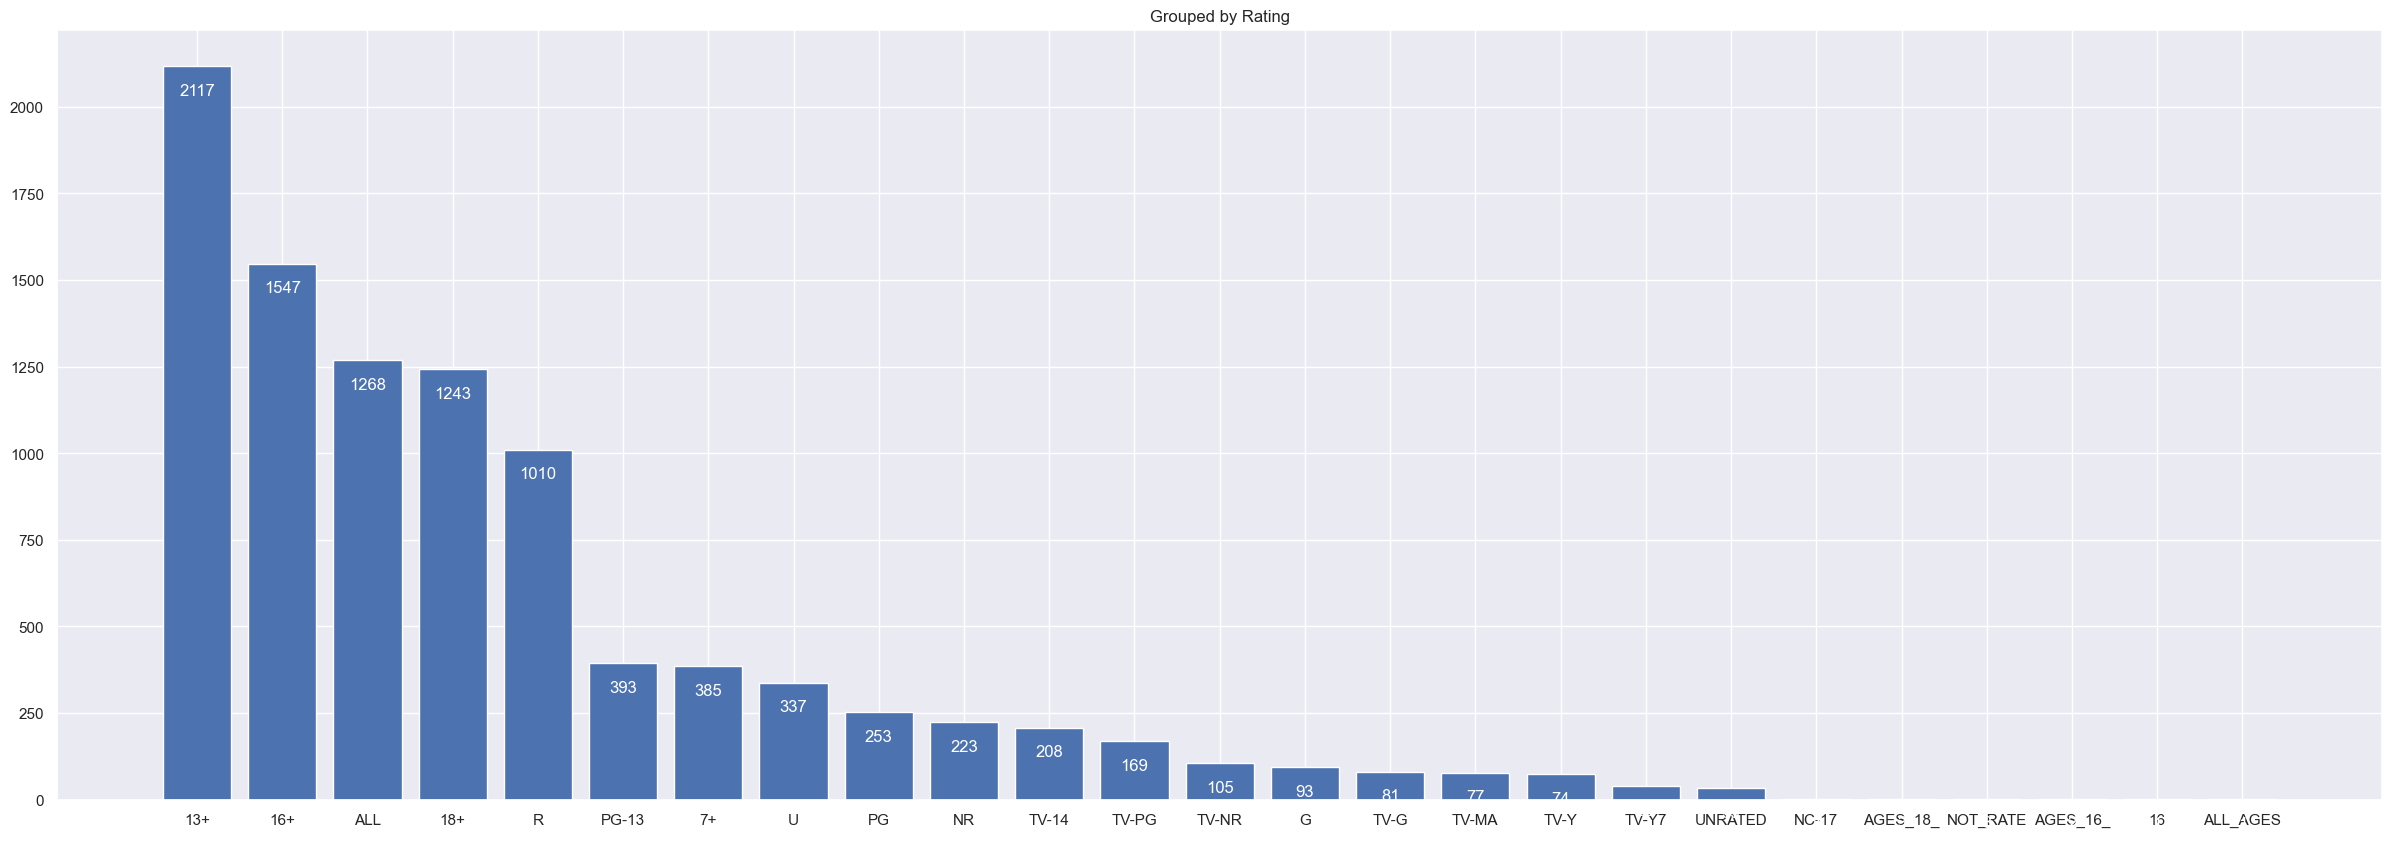

In [31]:
plt.figure(figsize=(30,10))
plt.bar(rating_count.index, rating_count.values)
plt.title('Grouped by Rating')
# plt.xticks([0,1],['Movies', 'TV Shows'])

#show the text detail
for i, value in enumerate(rating_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='center')
plt.show()

In [32]:
duration_count = df['duration'].value_counts()
duration_count

1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
21 Seasons       1
485 min          1
550 min          1
181 min          1
191 min          1
Name: duration, Length: 219, dtype: int64

In [33]:
listed_count = df['listed_in'].value_counts()
listed_count

Drama                                                                            986
Comedy                                                                           536
Drama, Suspense                                                                  399
Comedy, Drama                                                                    377
Animation, Kids                                                                  356
                                                                                ... 
Arts, Entertainment, and Culture, Music Videos and Concerts, Special Interest      1
Arts, Entertainment, and Culture, Comedy, Military and War                         1
Comedy, Faith and Spirituality, Kids                                               1
Arts, Entertainment, and Culture, Fantasy, Kids                                    1
Anime, Comedy, Drama                                                               1
Name: listed_in, Length: 518, dtype: int64

In [34]:
top4country = df[(df['country'] == 'United States') | (df['country'] == 'India') | (df['country'] == 'United Kingdom') | (df['country'] == 'Canada')]
top4country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,U,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,U,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,U,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,U,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9604,s9605,Movie,Bride Wars,Gary Winick,"Kate Hudson, Anne Hathaway, Kristen Johnston, ...",United States,unknown,2009,PG,89 min,Comedy,When a clerical error causes a clash in weddin...
9614,s9615,Movie,What Happens in Vegas,Tom Vaughan,"Cameron Diaz, Ashton Kutcher, Rob Corddry, ...",United States,unknown,2008,PG-13,99 min,Comedy,Jack Fuller (Ashton Kutcher) and Joy McNally (...
9641,s9642,Movie,Marley & Me,David Frankel,"Owen Wilson, Jennifer Aniston",United States,unknown,2008,PG,116 min,"Comedy, Drama, Kids",Jennifer Aniston and Owen Wilson unleash huge ...
9643,s9644,Movie,Love & Other Drugs,Edward Zwick,"K K, Jake Gyllenhaal, Anne Hathaway, Oliver Pl...",United States,unknown,2010,R,112 min,"Comedy, Drama",A womanizing pfizer drug rep with no sense of ...


In [35]:
top4_counts = top4country['country'].value_counts()
top4_counts

United States     253
India             229
United Kingdom     28
Canada             16
Name: country, dtype: int64

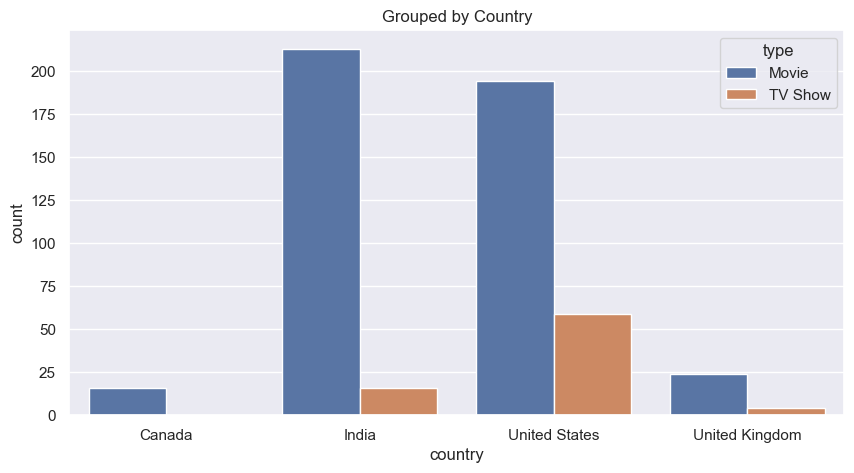

In [36]:
plt.figure(figsize=(10,5))
# plt.bar(top4_counts.index, top4_counts.values)
plt.title('Grouped by Country')
sns.countplot(x="country" , hue="type" , data=top4country)
# plt.xticks([0,1],['Movies', 'TV Shows'])


plt.show()


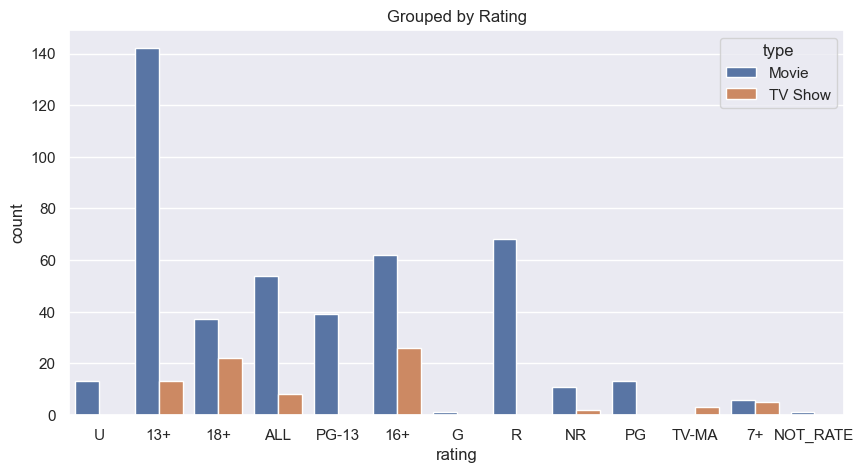

In [37]:
plt.figure(figsize=(10,5))
# plt.bar(top4_counts.index, top4_counts.values)
plt.title('Grouped by Rating')
sns.countplot(x="rating" , hue="type" , data=top4country)
# plt.xticks([0,1],['Movies', 'TV Shows'])


plt.show()